/var/folders/yj/6cwm4qyj6qz3dkx7t8z3qxc40000gn/T/ipykernel_83284/23273864.py:26: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(rpm, torque, degree)


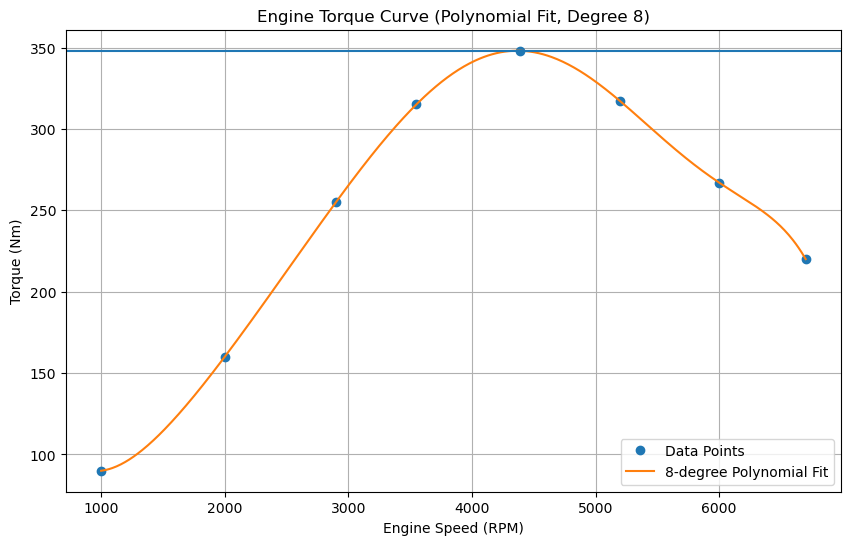

Coefficients of the fitted polynomial:
[-1.04664090e-26  1.99307504e-22 -1.05414515e-18 -2.44232328e-15
  4.79711056e-11 -2.20506038e-07  5.17626725e-04 -5.39424447e-01
  2.87640282e+02]
"coefficient_0": 287.64028187956416,
"coefficient_1": -0.5394244473390488,
"coefficient_2": 0.0005176267250038143,
"coefficient_3": -2.2050603785389334e-07,
"coefficient_4": 4.797110564326076e-11,
"coefficient_5": -2.442323279795882e-15,
"coefficient_6": -1.0541451487646943e-18,
"coefficient_7": 1.9930750381596873e-22,
"coefficient_8": -1.0466408952389249e-26,


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
points = np.array([
    [1000, 90],
    [2000, 160],
    #[2400, 190],
    #[2600, 215],
    [2900,255],
    #[3100, 265],
    [3550, 315],
    [4392, 348],
    [5200, 317],
    #[5800, 290],
    [6000, 267],
    #[6900, 188],
    [6700, 220]
])
maxTq = 348
rpm = points[:, 0]
torque = points[:, 1]

# Fit a 7th-degree polynomial to the data
degree = 8
coefficients = np.polyfit(rpm, torque, degree)

# Create the polynomial function using the coefficients
polynomial = np.poly1d(coefficients)

# Generate smooth RPM values for plotting the polynomial
rpm_smooth = np.linspace(rpm.min(), rpm.max(), 500)
torque_smooth = polynomial(rpm_smooth)

# Plot the data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(rpm, torque, 'o', label="Data Points")
plt.plot(rpm_smooth, torque_smooth, '-', label=f"{degree}-degree Polynomial Fit")
plt.axhline(maxTq)  # Assuming the maximum torque is the maximum value in the dataset
plt.xlabel("Engine Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.title(f"Engine Torque Curve (Polynomial Fit, Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficients
print("Coefficients of the fitted polynomial:")
print(coefficients)

for i in range(len(coefficients)):
    print(f'"coefficient_{i}": {coefficients[len(coefficients)-i-1]},')
